# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**RESPUESTA**
Basado en el poco conocimiento sobre propiedad raíz que tengo, considero que la información más relevante para tasar el precio de una propiedad es la siguiente:
Área total y área construída ya que los precios son directamente proporcionales al área de la propiedad y las construcciones en la misma.
La ubicación ya que por lo general en todas los ciudades las zonas están estratificadas y su valorización va asociado a otros factores externos como accesibilidad, servicios disponibles, zonas comerciales...
Número de habitaciones y de baños, ya que la capacidad de dormitorios y la privacidad en cuanto al uso de servicios básicos tiende a valorizar más la propiedad.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
#Cargue de la base de datos
BD = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv", sep=',')
print('El número de filas y columnas es respectivamente', BD.shape)   #número de filas y columnas
BD.head()

El número de filas y columnas es respectivamente (146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
BD.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [4]:
#Tipos de propiedades
print('El dataset cuenta con ', len(BD['property_type'].unique()),'tipos de propiedad y las cuales son las siguientes:',BD['property_type'].unique() )

El dataset cuenta con  10 tipos de propiedad y las cuales son las siguientes: ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']


In [5]:
#Número de registros por tipos de propiedad
BD['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Departamento'),
  Text(1, 0, 'Casa'),
  Text(2, 0, 'PH'),
  Text(3, 0, 'Lote'),
  Text(4, 0, 'Oficina'),
  Text(5, 0, 'Otro'),
  Text(6, 0, 'Local comercial'),
  Text(7, 0, 'Casa de campo'),
  Text(8, 0, 'Depósito'),
  Text(9, 0, 'Cochera')])

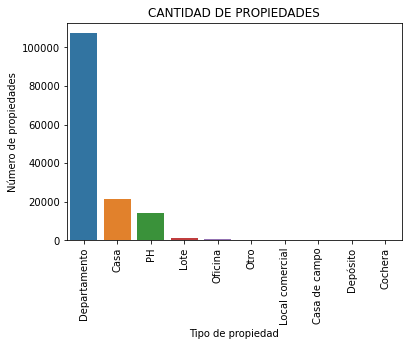

In [6]:
#Número de propiedades según el tipo de propiedad
sns.countplot(data=BD, x= 'property_type', order=BD.property_type.value_counts().index)
plt.title('CANTIDAD DE PROPIEDADES')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Número de propiedades')
plt.xticks(rotation= 90)

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Text(0, 0.5, '# de publicaciones')

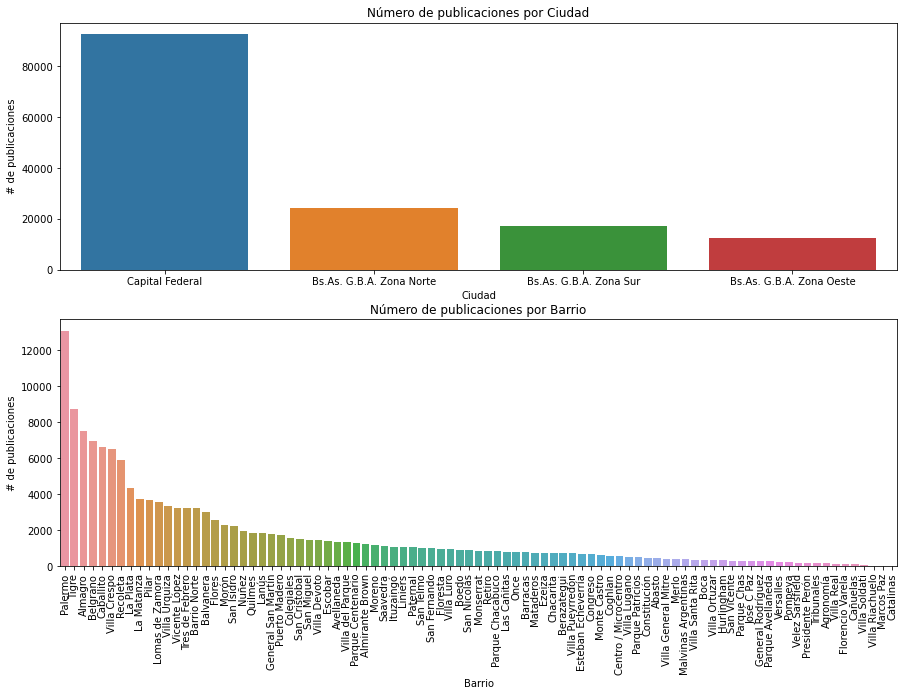

In [7]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.countplot(data=BD, x='l2', order = BD.l2.value_counts().index)
plt.title('Número de publicaciones por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('# de publicaciones')

plt.subplot(2,1,2)
sns.countplot(data=BD, x='l3', order = BD.l3.value_counts().index)
plt.title('Número de publicaciones por Barrio')
plt.xticks(rotation= 90)
plt.xlabel('Barrio')
plt.ylabel('# de publicaciones')



5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [8]:
#Filtrando el Dataset
BD1= BD[BD.property_type.isin(['Departamento','PH','Casa']) & BD.l2.isin(['Capital Federal'])]
BD1.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [9]:
#Resumen de estadísticos descriptivos
BD1.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


En los resultados anteriores se puede observar a partir del número de datos (count) cuales columnas tienen valores faltantes teniendo en cuenta que la nueva base de datos tiene un total de 91.485 registros. Por otra parte, se aprecia que el número promedio tanto de habitaciones como de baños es aproximado a dos con una tendencia a tener 3 habitaciones y dos baños según el percentil 75; aunque se aprecia una propiedad cuyo número de salas, habitaciones y baños es muy superior al promedio, al igual que la superficie total y superficie construída muy por encima a los valores promedios, lo cual podía indicar que se trate de un hotel o similar. Más adelante trabajaremos la identificación de atípicos.

Text(0.5, 1.0, 'Superficie total')

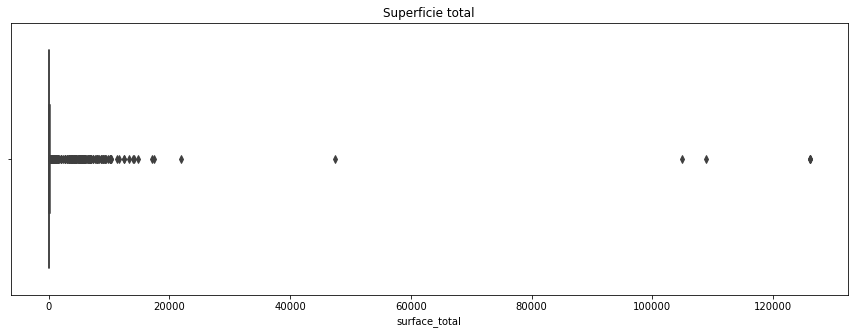

In [10]:
plt.figure(figsize = (15,5)) #distribución de la variable surface_total
sns.boxplot(data = BD1, x = "surface_total")
plt.title('Superficie total')

En el gráfico anterior observamos 7 outliers que se separan mucho de las otras instancias con valores superiores a 20000, por lo cual, sin embargo cuando se filtra por este valor la visualización sigue siendo muy deficiente, por lo cual se filtrará el dataset dejando sólamente las propiedades con un área inferior al percentil 99 y se espera que con ello se filtren también aquellas propiedades atípicas en cuanto a baños, habitaciones y area construída.

In [11]:
filtro=BD1[BD1['surface_total']>BD1['surface_total'].quantile(0.99)]

<AxesSubplot:xlabel='property_type', ylabel='count'>

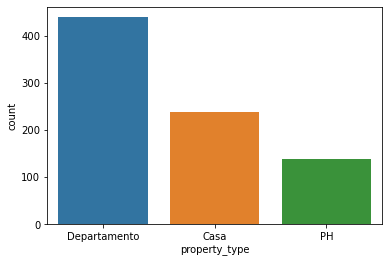

In [12]:
sns.countplot(data=filtro,x='property_type')

In [13]:
BD2 = BD1[BD1['surface_total']<BD1['surface_total'].quantile(0.99)] #filttrando menores al percentil 0.99
BD2.shape

(81738, 19)

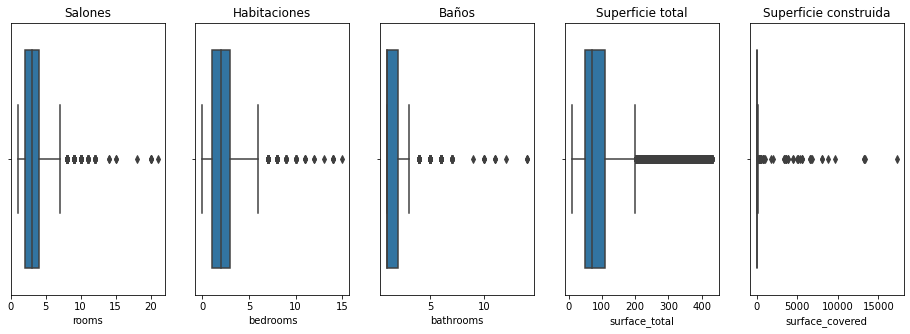

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(151)
sns.boxplot(data = BD2, x = "rooms")
plt.title('Salones')
plt.subplot(152)
sns.boxplot(data = BD2, x = "bedrooms")
plt.title('Habitaciones')
plt.subplot(153)
sns.boxplot(data = BD2, x= "bathrooms")
plt.title('Baños')
plt.subplot(154)
sns.boxplot(data = BD2, x = "surface_total")
plt.title('Superficie total')
plt.subplot(155)
sns.boxplot(data = BD2, x = "surface_covered")
plt.title('Superficie construida')
plt.show()

Ahora veamos la distriución de la superficie total mediante un histograma con el fin de conocer  las distribuciones de áreas por rangos e identificar los valores  más pequeños

(array([    0.,   102.,  1434.,  7567., 11684., 10537.,  8323.,  7666.,
         5844.,  5343.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

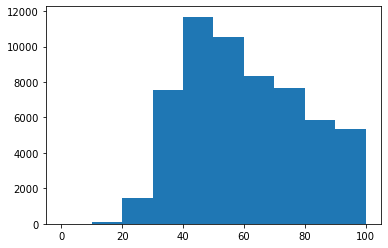

In [15]:
#histograma con bins en rangos  de 10 m2 hasta 100 m2
plt.hist(BD1['surface_total'], bins= 10, range=(0,100), density=False)

Se observan varias propiedades con una área inferior a 30 m2, por lo cual, tomando como referencia la normatividad Colombiana en la cual las viviendas no pueden tener un área inferior a 33 m2, vamos a tomar como referencia este valor y se filtrará la base de datos con el fin de excluir estos registros. También se excluyen los registros cuya área construída es mayor al área total ya que es información inconsistente pues ningúna propiedad puede tener un área construída mayor a su ára total. Veamos cuántas son estas últimas por tipo de propiedad:

Text(0, 0.5, 'Tipo de propiedad')

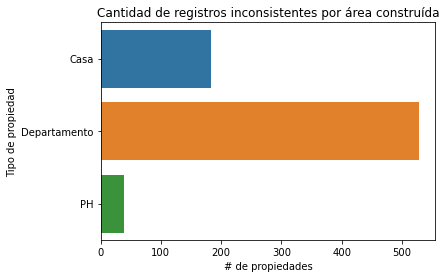

In [16]:
#filtro de propiedades con área construída mayor al área total
filtro1= BD2[BD2['surface_total']<BD2['surface_covered']]
sns.countplot(data=filtro1, y='property_type')
plt.title('Cantidad de registros inconsistentes por área construída')
plt.xlabel('# de propiedades')
plt.ylabel('Tipo de propiedad')

In [17]:
## Nueva base de datos filtrada sin áreas menor a 30 m2 ni superficies construídas mayores al area total
BD3= BD2[BD2['surface_total']>33]
BD3= BD3[BD3['surface_covered']<=BD3['surface_total']]
BD3.shape
BD3.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,72818.000000,72818.000000,76887.000000,76887.000000,76110.000000,76887.000000,76887.000000,7.688700e+04
mean,-34.598203,-58.435357,3.047667,2.024803,1.561043,94.546828,81.968408,2.642413e+05
std,0.023455,0.035594,1.216590,1.007565,0.831205,65.096164,54.179872,3.026150e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,34.000000,1.000000,6.000000e+03
25%,-34.612087,-58.457980,2.000000,1.000000,1.000000,51.000000,46.000000,1.300000e+05
50%,-34.598457,-58.433197,3.000000,2.000000,1.000000,73.000000,65.000000,1.850000e+05
75%,-34.583695,-58.410998,4.000000,3.000000,2.000000,112.000000,97.000000,2.850000e+05
max,-34.535909,-58.353930,21.000000,15.000000,14.000000,430.000000,428.000000,3.243423e+07


Ahora se revisará la distribución de la variable Precio ya que esta será la variable objetivo y la presencia de outliers puede afectar considerablemente la precisión de cualquier modelo de predicción en su entrenamiento.

([<matplotlib.axis.XTick at 0x17580ecca30>,
 [Text(0, 0, '0'),
  Text(5000000, 0, '5millones'),
  Text(10000000, 0, '10millones'),
  Text(20000000, 0, '20millones'),
  Text(35000000, 0, '35millones')])

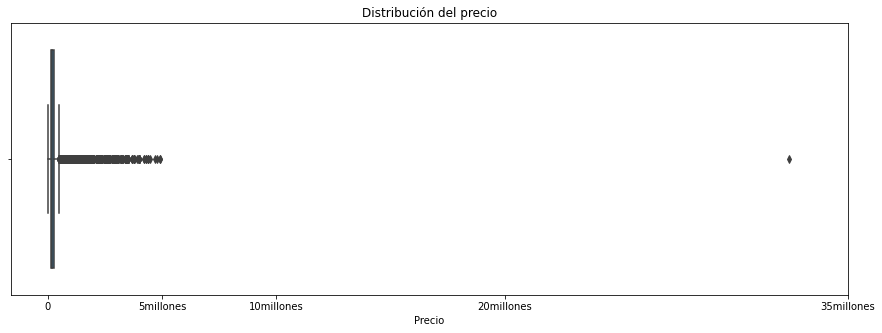

In [18]:
#Distribución del Precio
plt.figure(figsize = (15,5))
sns.boxplot(data=BD3, x='price')
plt.title('Distribución del precio')
plt.xlabel('Precio')
plt.xticks([0,5000000,10000000,20000000,35000000], labels=['0','5millones','10millones','20millones','35millones'])

([<matplotlib.axis.XTick at 0x175817d37c0>,
 [Text(0, 0, '0'),
  Text(100000, 0, '100mil'),
  Text(500000, 0, '500mil'),
  Text(1000000, 0, '1millón'),
  Text(2000000, 0, '2millones')])

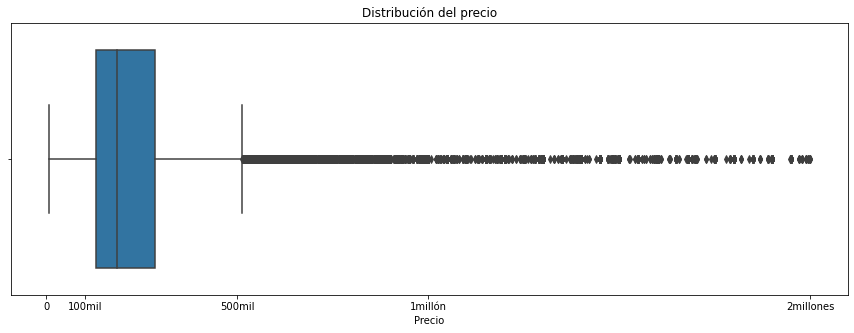

In [19]:
#En el gráfico anterior se observa  una propiedad con un valor demasiado elevado y que su área total y área construída no guarda relación con el precio,por  lo cual se filtrará este valor
#BD3[BD3['price']>2000000]
BD4=BD3[BD3['price']<2000000]
plt.figure(figsize = (15,5))
sns.boxplot(data=BD4, x='price')
plt.title('Distribución del precio')
plt.xlabel('Precio')
plt.xticks([0,100000,500000,1000000,2000000], labels=['0','100mil','500mil','1millón','2millones'])

Ahora veamos como se distribuyen estas variables respecto a otra con una distribución por pares

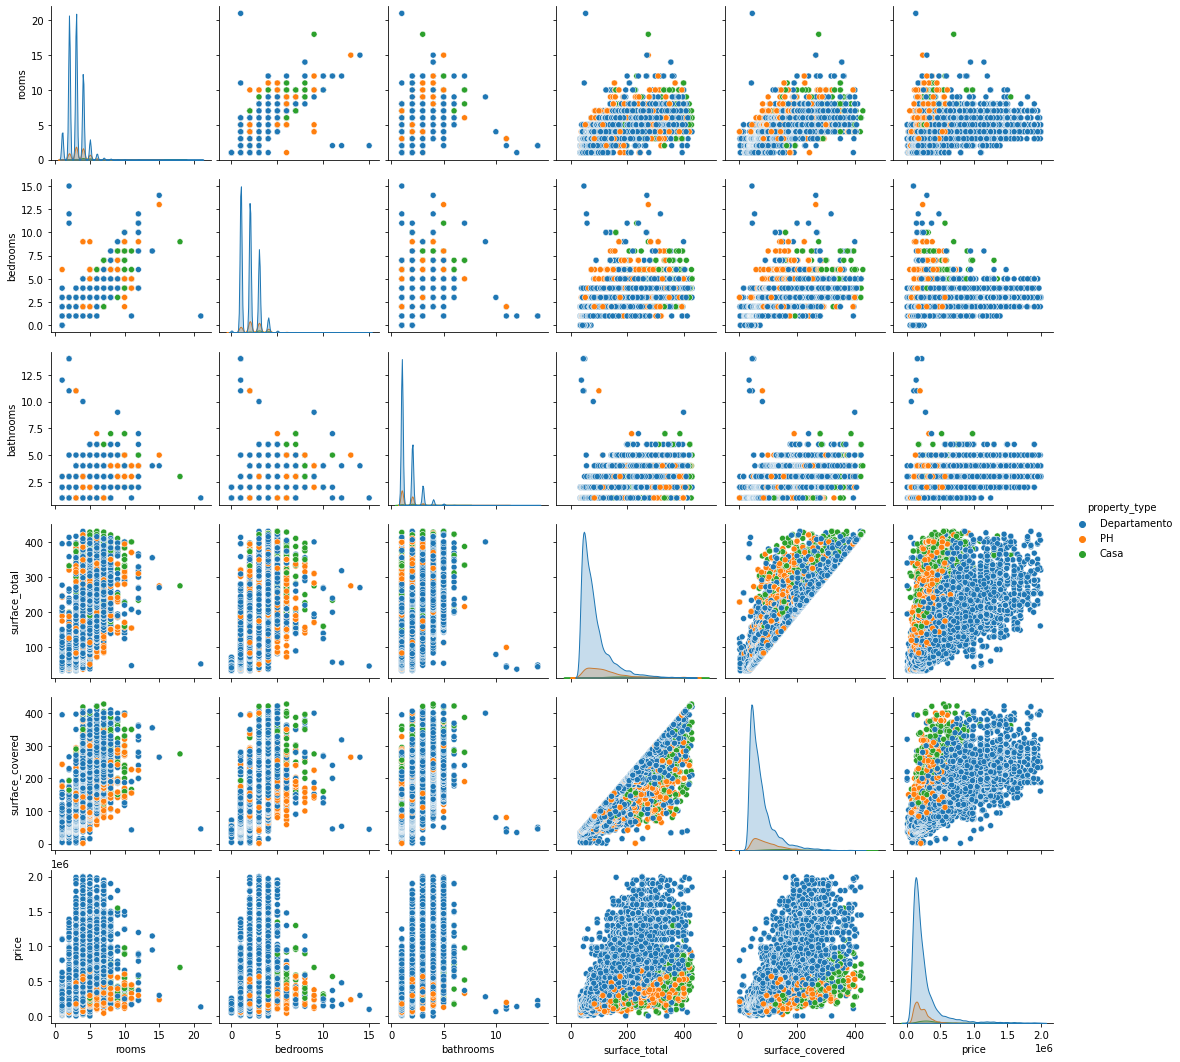

In [20]:
#pairplot de las variables numéricas
f1= BD4[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']]
sns.pairplot(data=f1, hue='property_type')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [21]:
#cálculo de la correlación
corr= BD4.corr()
corr

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.093556,-0.028173,-0.040476,0.095652,-0.002238,0.027046,0.213674
lon,-0.093556,1.000000,0.090595,0.071932,0.100464,0.053426,0.125287,0.208541
rooms,-0.028173,0.090595,1.000000,0.928080,0.574263,0.733644,0.770374,0.503291
bedrooms,-0.040476,0.071932,0.928080,1.000000,0.573536,0.703417,0.735083,0.462483
bathrooms,0.095652,0.100464,0.574263,0.573536,1.000000,0.630758,0.676724,0.650997
surface_total,-0.002238,0.053426,0.733644,0.703417,0.630758,1.000000,0.930150,0.694505
surface_covered,0.027046,0.125287,0.770374,0.735083,0.676724,0.930150,1.000000,0.759772
price,0.213674,0.208541,0.503291,0.462483,0.650997,0.694505,0.759772,1.000000


<AxesSubplot:>

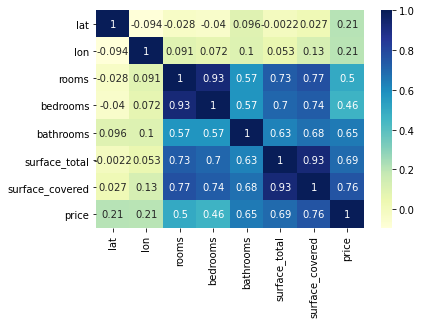

In [22]:
#gráfico de correlaciones
sns.heatmap(BD4.corr(), cmap="YlGnBu",annot=True)

De acuerdo al grado de correlación entra las variables predictoras y el precio o variable objetivo, las que parecen ser mejores predictoras son la superficie total y el área construída.

En las siguientes líneas vamos a observar si la correlación entre las variables y el precio mejora según el tipo de propiedad:

In [23]:
#filtramos tres sets de datos para  cada tipo de propiedad
departamento = BD4[BD4.property_type == 'Departamento']
casa = BD4[BD4.property_type == 'Casa']
PH = BD4[BD4.property_type == 'PH']

<AxesSubplot:>

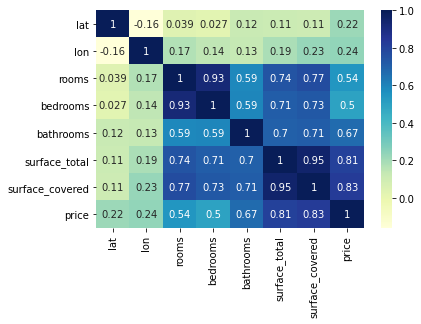

In [24]:
sns.heatmap(departamento.corr(),cmap= "YlGnBu",annot=True) #Correlación por tipo de propiedad departamento

<AxesSubplot:>

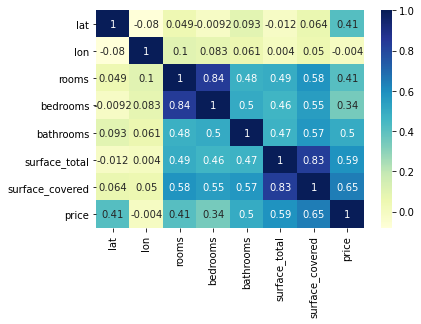

In [25]:
sns.heatmap(casa.corr(),cmap= "YlGnBu",annot=True) #Correlación por tipo de propiedad casa

<AxesSubplot:>

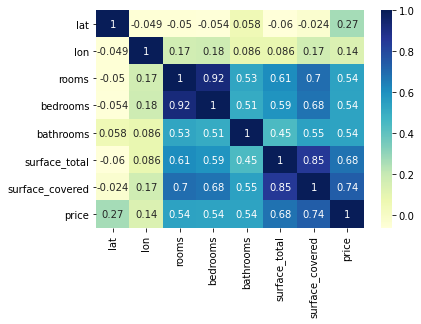

In [26]:
sns.heatmap(PH.corr(),cmap= "YlGnBu",annot=True) #Correlación por tipo de propiedad PH

En los tres mapas de correlación anteriores se aprecia que la correlación entre las variables predictoras y el precio mejora un poco para el tipo de propiedad Departamento. Adicionalmente, en los tres tipos de propiedad son mayores las correlaciones entre área total-área construída y número de salones- número de habitaciones.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### Pregunta: 
¿El valor aumenta más según el número de habitaciones o el número de baños?

In [27]:
# separemos la información para responder la pregunta
reto= BD4[['bedrooms','bathrooms','price','property_type']]

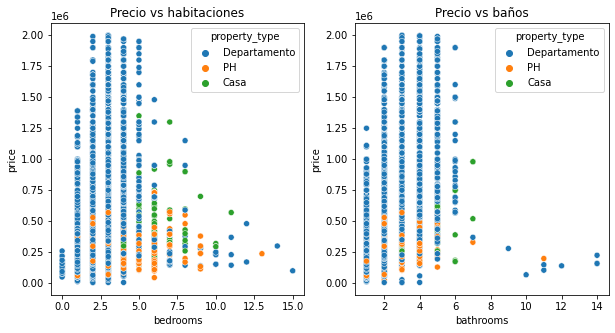

In [28]:
# se grafica tanto el número de habitaciones vs el precio como el número de baños vs el precio
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(data=reto, x='bedrooms',y='price', markers='+', hue='property_type')
plt.title('Precio vs habitaciones')

plt.subplot(1,2,2)
sns.scatterplot(data=reto, x='bathrooms',y='price', markers='o', hue='property_type')
plt.title('Precio vs baños')
plt.show()

De acuerdo a las distribuciones anteriores no se aprecia una tendencia que permita inferir si el precio aumenta más en función del número de habitaciones o de baños

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

### Métrica de evalucación
La metricia de evaluación será ***RMSE***, para validar la diferencia entre el valor real y la predicción, ya que es una métrica sensible a valores atípicos


In [29]:
# Carga del dataset con los filtros solicitados
bd= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
bd2= bd[(bd['l2']=='Capital Federal') & (bd['property_type'].isin(['Departamento','Casa','PH']))]
bd2= bd2[(bd2['surface_total']>=15) & (bd2['surface_total']<=1000)]
bd2= bd2[bd2['price']<=4000000]
bd2= bd2[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
bd2.dropna(inplace=True)
bd2.shape

(81019, 6)

### variables predictoras y variable objetivo

In [30]:
#variables
X= bd2.drop(columns='price')
y= bd2['price']
#X.shape

### train/test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

### Modelo Benchmark

Como modelo benchmark se creará un modelo de regresión lineal

In [32]:
linear_model = LinearRegression() #se crea el objeto del modelo
linear_model.fit(X_train, y_train) #entrenando el modelo 

LinearRegression()

In [33]:
y_train_pred = linear_model.predict(X_train) #Prediciendo el modelo
y_test_pred = linear_model.predict(X_test)

In [34]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) #apicando la medida del error a los datos de entrenamiento
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) #aplicando la medida del error a los datos de validación
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361587


Se puede observar que los valores del RMSE para los resultados de entrenamiento y de prueba son altos.

### Modelo de KNN vecinos más cercanos

In [35]:
#Se crea un modelo de regresión basado en vecinos cercanos
clf_knn = KNeighborsRegressor()
clf_knn

KNeighborsRegressor()

In [36]:
clf_knn.fit(X_train,y_train) #Entreno el modelo de KNN Vecinos mas cercanos 

KNeighborsRegressor()

In [37]:
y_train_pred_vecinos = clf_knn.predict(X_train) # Predicciones con el set de entrenamiento
y_test_pred_vecinos= clf_knn.predict(X_test) # Predicciones con el set de prueba

In [38]:
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_vecinos))# Luego calculo el RMSE para los datos de entrenamiento
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_vecinos)) #calculo el RMSE para los datos de validacion
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_knn}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_knn}')

La raíz del error cuadrático medio en Train es de: 121300.24049431273
La raíz del error cuadrático medio en Test es de: 155040.1332898459


Ahora se buscará optimizar el hiperparámetro de vecinos más cercanos que permita reducir el RMSE

In [39]:
# Definimos las listas vacias para los valores deseados
lista_vecinos_train = []
lista_vecinos_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25,30,35,40,45,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors = k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_vecinos = clf.predict(X_train)
    rmse_train_vecinos = np.sqrt(mean_squared_error(y_train, y_train_pred_vecinos))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_vecinos = clf.predict(X_test)
    rmse_test_vecinos = np.sqrt(mean_squared_error(y_test, y_test_pred_vecinos))
    
    # Agregar la información a las listas
    lista_vecinos_train.append(rmse_train_vecinos)
    lista_vecinos_test.append(rmse_test_vecinos)

A continuación se grafican los RMSE de los modelos anteriores con el fin de identificar el hiperparámetro óptimo, es decir, el que genere el mejor modelo y con un menor RMSE

Minimo de RMSE en test es  152317.82229037234  en vecinos 3


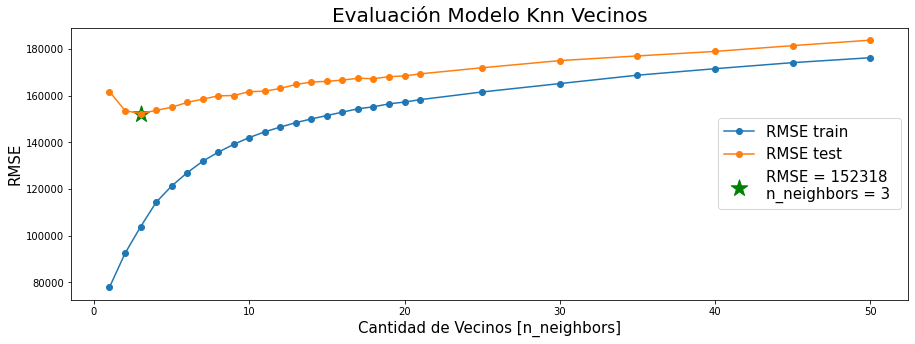

In [40]:
min_test_vecinos = np.amin(lista_vecinos_test)
lista_test_vecinos_op = lista_vecinos_test.index(min(lista_vecinos_test))
vecinos_op = k_vecinos[lista_test_vecinos_op]

print('Minimo de RMSE en test es ', min_test_vecinos,' en vecinos', vecinos_op)


plt.figure(figsize=(15,5))

plt.plot(k_vecinos, lista_vecinos_train, 'o-', label = 'RMSE train')
plt.plot(k_vecinos, lista_vecinos_test, 'o-', label = 'RMSE test')
plt.xlabel('Cantidad de Vecinos [n_neighbors]', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Evaluación Modelo Knn Vecinos', size = 20)
plt.scatter(vecinos_op, min_test_vecinos, s=300, marker = '*', 
         label = 'RMSE = {} \nn_neighbors = {} '.format(round(min_test_vecinos),vecinos_op), color = 'green')
plt.legend(loc = 'center right', fontsize = 15)
plt.savefig('KNN1.png')

plt.show()

Del resultado anterior se puede concluir que el mejor modelo de regresión basado en vecinos cercanos se da con 3 vecinos y un RMSE de 152317

In [41]:
clf_op = KNeighborsRegressor(n_neighbors = 3)#creo de nuevo el modelo con el hiperparametro optimo que es número de vecinos igual a 3
clf_op.fit(X_train, y_train)
y_train_pred_vecinos = clf_op.predict(X_train)
y_test_pred_vecinos = clf_op.predict(X_test)
rmse_train_vecinos = np.sqrt(mean_squared_error(y_train, y_train_pred_vecinos)) #calculo de nuevo RMSE para train
rmse_test_vecinos = np.sqrt(mean_squared_error(y_test, y_test_pred_vecinos)) #calculo de nuevo RMSE para test
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_vecinos}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_vecinos}')

La raíz del error cuadrático medio en Train es de: 103804.20852724434
La raíz del error cuadrático medio en Test es de: 152317.82229037234


### Modelo Árbol de Regresión

In [42]:
#Se crea el objeto de regresión bajo árbol de decisión
tree = DecisionTreeRegressor(random_state=20)

In [43]:
tree.fit(X_train, y_train) #Entrenamos el modelo

DecisionTreeRegressor(random_state=20)

In [44]:
y_train_pred_arbol = tree.predict(X_train) #El siguiente paso es Predecir  sobre el conjunto de Train y sobre el conjunto de Test
y_test_pred_arbol = tree.predict(X_test)

In [45]:
rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol)) #Luego calculo el RMSE para los datos de entrenamiento
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol)) #Luego calculo el RMSE para los datos de validación
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 52460.90877279167
La raíz del error cuadrático medio en Test es de: 150416.4890555437


De igual manera para este modelo se debe buscar el hiperparámetro de profundidad óptimo

In [46]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_train_arbol = []
lista_test_arbol = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,5,6,7,8,9,10,10.5,11,12,13,14,15,16,17,18,19,20,21,22,24,25,30,40,50]

# Generamos en loop sobre los distintos valores de profundidad 
for i in max_depths:
    
    
    # Definir el modelo con el valor de profundidad
    tree = DecisionTreeRegressor(max_depth = i, random_state=20)
    
    # Entrenar el modelo
    tree.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_arbol = tree.predict(X_train)
    train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_arbol = tree.predict(X_test)
    test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
    # Agregar la información a las listas
    lista_train_arbol.append(train_arbol)
    lista_test_arbol.append(test_arbol)

El mínimo de RMSE en test es  146702.44054503654  en  17  profundidad del árbol.


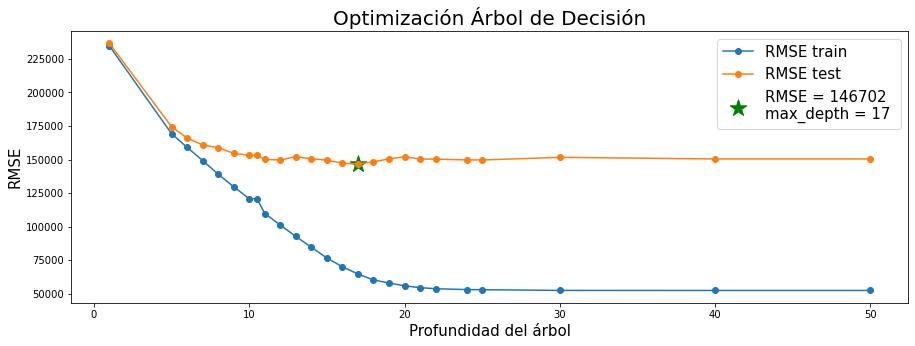

In [47]:
min_test_arbol = np.amin(lista_test_arbol)
lista_test_arbol_op = lista_test_arbol.index(min(lista_test_arbol))
max_depths_op = max_depths[lista_test_arbol_op]
print('El mínimo de RMSE en test es ', min_test_arbol, ' en ', max_depths_op, ' profundidad del árbol.')

plt.figure(figsize=(15,5))

plt.plot(max_depths, lista_train_arbol, 'o-', label = 'RMSE train')
plt.plot(max_depths, lista_test_arbol, 'o-', label = 'RMSE test')
plt.xlabel('Profundidad del árbol', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Optimización Árbol de Decisión', size = 20)
plt.scatter(max_depths_op, min_test_arbol, s=300, marker = '*', 
         label = 'RMSE = {} \nmax_depth = {} '.format(round(min_test_arbol),max_depths_op), color = 'green')
plt.legend(loc = 'upper right', fontsize = 15)
plt.savefig('Arbol1.png')
plt.show()

El gráfico anterior sugiere que el mejor resultado se obtiene con una regresión de árboles de decisión con una profundiad igual a 17 y un RMSE de 146702

In [48]:
tree_op= DecisionTreeRegressor(max_depth = 17, random_state=20)
tree_op.fit(X_train, y_train)
y_train_pred_arbol = tree_op.predict(X_train)
y_test_pred_arbol = tree_op.predict(X_test)

rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 64721.0697732051
La raíz del error cuadrático medio en Test es de: 146702.44054503654


Con este modelo de regresión bajo árboles de decisión, se obtienen mejores metricas respecto a los modelos de vecinos cercanos y el modelo benchmark

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 64721.0697732051
Raíz del error cuadrático medio en Test: 146702.44054503654


C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


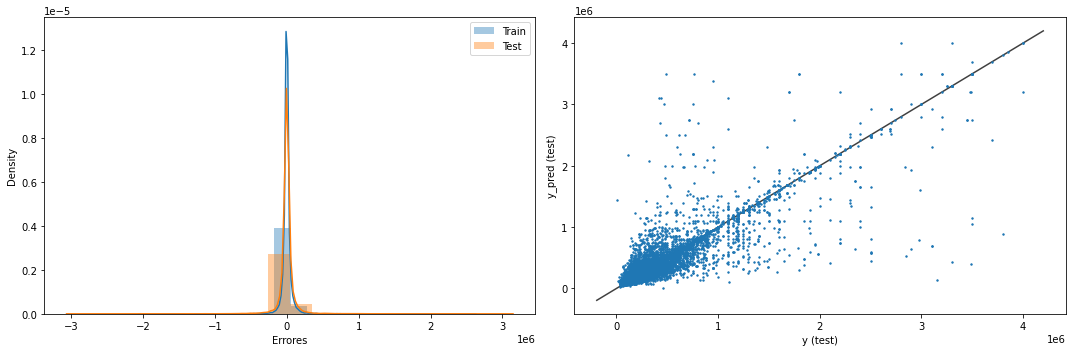

Modelo: Vecinos más cercanos - KNN
Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


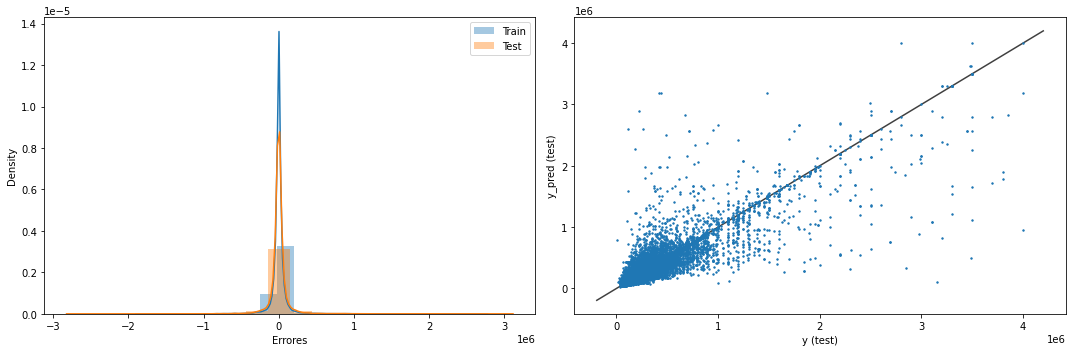

Modelo: Regresión Lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361587


C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


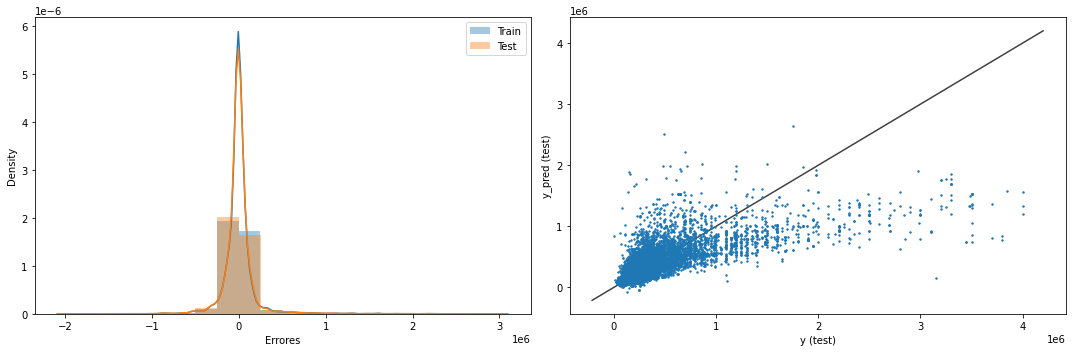

In [49]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos - KNN', 'Regresión Lineal',]

for i, model in enumerate([ tree_op, clf_op, linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'Train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'Test')
    plt.xlabel('Errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

In [50]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

predicciones_tree = pd.concat([val_real.rename('ValorReal'),
                          val_pred.rename('ValorPred') ,
                          abs(val_real-val_pred).rename('Dif(+/-)'),
                          abs((val_real-val_pred)/(val_pred)*100).rename('Porcentaje de la diferencia')] ,  axis=1)

predicciones_tree

,ValorReal,ValorPred,Dif(+/-),Porcentaje de la diferencia
0,189000.0,1.427302e+05,46269.811321,32.417677
1,67500.0,1.154614e+05,47961.415385,41.538912
2,260000.0,2.670370e+05,7037.037037,2.635229
3,205000.0,1.682000e+05,36800.000000,21.878716
4,85000.0,1.442500e+05,59250.000000,41.074523
...,...,...,...,...
24301,450000.0,4.500000e+05,0.000000,0.000000
24302,300000.0,1.790000e+05,121000.000000,67.597765
24303,235000.0,2.350000e+05,0.000000,0.000000
24304,1290000.0,1.290000e+06,0.000000,0.000000


### Conclusión

Al comparar el RMSE de los datos de validación de los 3 modelos, podemos observar que todos los modelos tienen errores altos, pero el modelo de Arbol de Regresión tiene el menor error, por lo cual predice mejor. El modelo que tuvo el peor desempeño fue el de Regresión Lineal

En el gráfico y(test) vs y_pred(test) para el conjunto de test, se puede observar que los puntos están más cerca de la diagonal (la relación y=x ) en el modelo de Árbol de Regresión, lo que nos permite afirmar que tuvo mejor predicción, al compararlo con los otros modelos

De la tabla anterior, se puede diferir que en algunas instancias hay porcentajes altos de diferencia entre el valor predecido y el real.

Durante el recorrido se pudo identificar que también hay otros atributos como surface o bedrooms, que podrian ser mejores para nuestros modelos

# ***PROYECTO 2***

## PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

- Detección y eliminación de Outliers
- Encoding
- Imputación de valores faltantes
- Escalado de datos
- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

En primer lugar, vamos a importar la librerías requeridas y a cargar nuevamente el datset y consultaremos cuántas filas y columnas tiene.

In [51]:
# Importando las librerías
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Carga del dataset con los filtros iniciales
bd= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
bd.shape

(146660, 19)

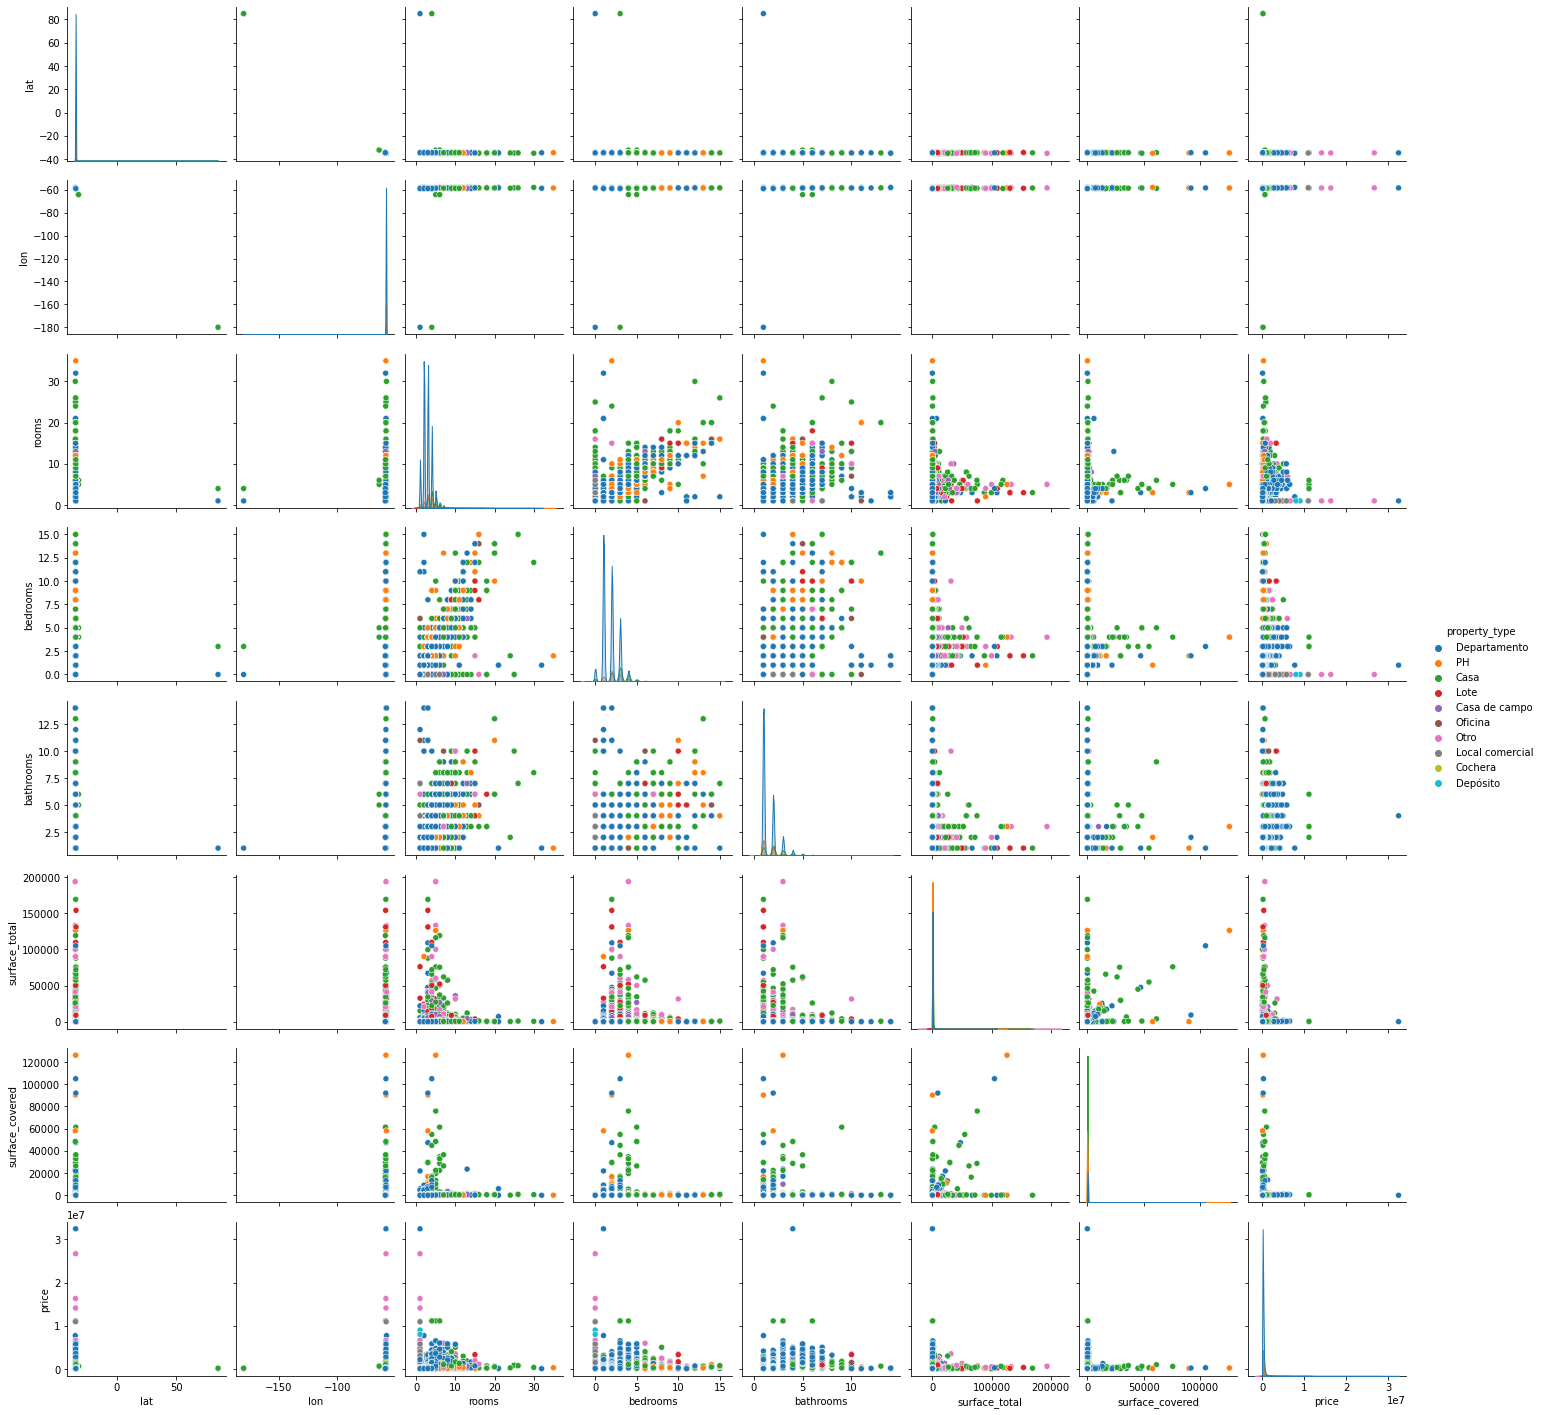

In [52]:
# Recordemos la distribución por pares de variables del dataset y para diferenciar un poco al pairplot del proyecto 1, le daremos la instrucción de no tener en cuenta nos valores nulos
sns.pairplot(data=bd, hue='property_type',dropna=True)

In [53]:
#Resúmen descriptivo de los datos
bd.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


En los resultados anteriores se pueden encontrar valores atípicos en las principales variables predictoras que se utilizaron en el proyecto 1: área total y construída, precio, salones, baños y habitaciones, ya que en los plots se aprecian situaciones como las siguientes:
- Precios muy elevados en comparación a otras propiedades con las mismas áreas o la misma cantidad de salones.
- Áreas construídas superiores al área total o demasiado grandes con relación al número de salones de la mayoría de las propiedades
- Número de salones (salones, baños, habitaciones) muy elevados en comparación con otras propiedades de areas similares, lo cual podría ser indicio de que se trate de algún hotel

## Detección y eliminación de valores atípicos

En las siguientes líneas vamos a identificar y eliminar valores atípicos en las principales variables predictoras que se utilizaron en el proyecto 1: área total y construída, precio, salones, baños y habitaciones

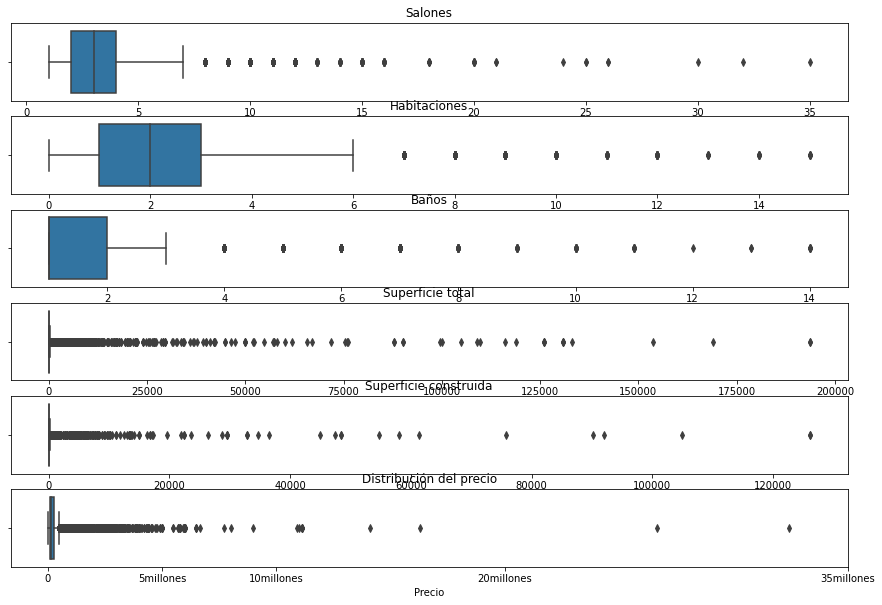

In [54]:
#Valores
plt.figure(figsize=(15,10))
plt.subplot(611)
sns.boxplot(data = bd, x = "rooms")
plt.title('Salones')
plt.subplot(612)
sns.boxplot(data = bd, x = "bedrooms")
plt.title('Habitaciones')
plt.subplot(613)
sns.boxplot(data = bd, x= "bathrooms")
plt.title('Baños')
plt.subplot(614)
sns.boxplot(data = bd, x = "surface_total")
plt.title('Superficie total')
plt.subplot(615)
sns.boxplot(data = bd, x = "surface_covered")
plt.title('Superficie construida')
plt.subplot(616)
sns.boxplot(data=bd, x='price')
plt.title('Distribución del precio')
plt.xlabel('Precio')
plt.xticks([0,5000000,10000000,20000000,35000000], labels=['0','5millones','10millones','20millones','35millones'])
plt.show()

Estos gráficos muestran valores atípicos  en  las seis variables y  sólamente en la región superior de la  distribución, razón por la cual eliminaremos estos valores atípicos basados en la técnica del rango intercuartílico aplicando una distancia de  1,5  iqr y en algunos casos la regla de 3 sigma

In [55]:
#rango intercuartílico  para rooms
q25,q75 = np.percentile(bd.rooms.values, [25,75])
iqr_rooms = q75 - q25
minimo_rooms = q25 - 1.5*iqr_rooms
maximo_rooms = q75 + 1.5*iqr_rooms
mascara_outliers_rooms = (bd.rooms < minimo_rooms) | (bd.rooms > maximo_rooms)
print('Para el número de salones tenemos ',mascara_outliers_rooms.sum(),' valores atípicos',
    'un rango mínimo de ',{minimo_rooms},'y máximo de',{maximo_rooms})

Para el número de salones tenemos  1447  valores atípicos un rango mínimo de  {-1.0} y máximo de {7.0}


In [56]:
#rango intercuartílico  para bedrooms
q25,q75 = np.percentile(bd.bedrooms.values, [25,75])
iqr_bedrooms = q75 - q25
minimo_bedrooms = q25 - 1.5*iqr_bedrooms
maximo_bedrooms = q75 + 1.5*iqr_bedrooms
mascara_outliers_bedrooms = (bd.bedrooms < minimo_bedrooms) | (bd.bedrooms > maximo_bedrooms)
print('Para el número de habitaciones tenemos ',mascara_outliers_bedrooms.sum(),' valores atípicos',
    'un rango mínimo de ',{minimo_bedrooms},'y máximo de',{maximo_bedrooms})

Para el número de habitaciones tenemos  428  valores atípicos un rango mínimo de  {-2.0} y máximo de {6.0}


In [57]:
#rango intercuartílico  para bathrooms
#q25,q75 = np.percentile(bd.bathrooms.values, [25,75])
#iqr_bathrooms = q75 - q25
#minimo_bathrooms = q25 - 1.5*iqr_bathrooms
#maximo_bathrooms = q75 + 1.5*iqr_bathrooms
#mascara_outliers_bathrooms = (bd.bathrooms < minimo_bathrooms) | (bd.bathrooms > maximo_bathrooms)
#print('Para el número de baños tenemos ',mascara_outliers_bathrooms.sum(),' valores atípicos',
#    'un rango mínimo de ',{minimo_bathrooms},'y máximo de',{maximo_bathrooms})

#tres sigma para bathrooms
valor_medio = bd.bathrooms.mean()
std = bd.bathrooms.std()
minimobathrooms = valor_medio - 3*std
maximobathrooms = valor_medio + 3*std
mascara_outliersbathrooms = np.logical_or(bd.bathrooms < minimobathrooms, bd.bathrooms > maximobathrooms)
print('Para el número de baños tenemos ',mascara_outliersbathrooms.sum(),' valores atípicos',
    'un rango mínimo de ',{minimobathrooms},'y máximo de',{maximobathrooms})

Para el número de baños tenemos  1646  valores atípicos un rango mínimo de  {-1.0679784697287216} y máximo de {4.267967098258319}


In [58]:
#rango intercuartílico  para surface_total
#q25,q75 = np.percentile(bd.surface_total.values, [25,75])
#iqr_surface_total = q75 - q25
#minimo_surface_total = q25 - 1.5*iqr_surface_total
#maximo_surface_total = q75 + 1.5*iqr_surface_total
#mascara_outliers_surface_total = (bd.surface_total < minimo_surface_total) | (bd.surface_total > maximo_surface_total)
#print('Para el área total tenemos ',mascara_outliers_surface_total.sum(),' valores atípicos',
#    'un rango mínimo de ',{minimo_surface_total},'y máximo de',{maximo_surface_total})

#tres sigma para surface_total
valor_medio = bd.surface_total.mean()
std = bd.surface_total.std()
minimosurface_total = valor_medio - 3*std
maximosurface_total = valor_medio + 3*std
mascara_outlierssurface_total = np.logical_or(bd.surface_total < minimosurface_total, bd.surface_total > maximosurface_total)
print('Para el número de baños tenemos ',mascara_outlierssurface_total.sum(),' valores atípicos',
    'un rango mínimo de ',{minimosurface_total},'y máximo de',{maximosurface_total})

Para el número de baños tenemos  331  valores atípicos un rango mínimo de  {-5895.947058728795} y máximo de {6329.692835012559}


In [59]:
#rango intercuartílico  para surface_covered
#q25,q75 = np.percentile(bd.surface_covered.values, [25,75])
#iqr_surface_covered = q75 - q25
#minimo_surface_covered = q25 - 1.5*iqr_surface_covered
#maximo_surface_covered = q75 + 1.5*iqr_surface_covered
#mascara_outliers_surface_covered = (bd.surface_covered < minimo_surface_covered) | (bd.surface_covered > maximo_surface_covered)
#print('Para la superficie construída tenemos ',mascara_outliers_surface_covered.sum(),' valores atípicos',
#    'un rango mínimo de ',{minimo_surface_covered},'y máximo de',{maximo_surface_covered})

#tres sigma para surface_covered
valor_medio = bd.surface_covered.mean()
std = bd.surface_covered.std()
minimosurface_covered = valor_medio - 3*std
maximosurface_covered = valor_medio + 3*std
mascara_outliersurface_covered = np.logical_or(bd.surface_covered < minimosurface_covered, bd.surface_covered > maximosurface_covered)
print('Para el número de baños tenemos ',mascara_outliersurface_covered.sum(),' valores atípicos',
    'un rango mínimo de ',{minimosurface_covered},'y máximo de',{maximosurface_covered})

Para el número de baños tenemos  201  valores atípicos un rango mínimo de  {-2637.7547401627726} y máximo de {2863.3907621066974}


In [60]:
#rango intercuartílico  para price
q25,q75 = np.percentile(bd.price.values, [25,75])
iqr_price = q75 - q25
minimo_price = q25 - 1.5*iqr_price
maximo_price = q75 + 1.5*iqr_price
mascara_outliers_price = (bd.price < minimo_price) | (bd.price > maximo_price)
print('Para el precio ',mascara_outliers_price.sum(),' valores atípicos',
    'un rango mínimo de ',{minimo_price},'y máximo de',{maximo_price})

Para el precio  10982  valores atípicos un rango mínimo de  {-120000.0} y máximo de {496000.0}


En las líneas anteriores identificamos los valores atípicos utilizando la técnica del rango intercuartílico para el precio, el número de salones y el número de habitaciones; para las áreas total, construída y el número de baños se aplica en segunda instancia la regla de las tres sigma ya que no funcionó el rango intercuartílico por la distribución de las variables (correr las líneas comentariadas).

Por otra parte, si comparamos los resultados anteriores con los boxplots y el resúmen estadístio previo (valores mínimos), se puede observar que el total de valores atípicos identificados corresponden a valores de la región superior de los boxplots, por lo cual, del dataset filtraremos aquellas instancias que sean menores al valor máximo identificado para cada variable con las tres sigma o rango intercuartílico.

In [61]:
#Nueva base de datos sin valores atípicos
bd2= bd[(bd.rooms < maximo_rooms)&(bd.bedrooms < maximo_bedrooms)&(bd.bathrooms < maximobathrooms)&(bd.surface_total < maximosurface_total)&(bd.surface_covered < maximosurface_covered)&(bd.price < maximo_price)]
#bd2.shape
bd2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,104241.000000,104241.000000,111348.000000,111348.000000,111348.000000,111348.000000,111348.000000,111348.000000
mean,-34.599071,-58.464530,2.917179,1.918238,1.438266,125.308178,78.786148,183759.009241
std,0.095161,0.140208,1.104759,0.918747,0.663622,243.215969,60.787888,96894.035231
min,-35.150806,-59.042416,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,-34.621309,-58.501817,2.000000,1.000000,1.000000,50.000000,45.000000,110000.000000
50%,-34.599252,-58.443919,3.000000,2.000000,1.000000,72.000000,63.000000,159900.000000
75%,-34.573316,-58.412983,4.000000,3.000000,2.000000,115.000000,93.000000,239000.000000
max,-34.202767,-57.805832,6.000000,5.000000,4.000000,6085.000000,2773.000000,495000.000000


## Imputación de valores faltantes

De la línea anterior y en la siguiente se puede observar que las únicas variables que quedan con valores faltantes son la latitud y longitud, por los cual se hará la imputación de valores faltantes para estas dos variables sólo con fines prácticos ya que dichos atributos no serán tenidos en cuenta en los modelos que se  entrenan más adelante.

In [62]:
bd2.isna().sum()

start_date            0
end_date              0
created_on            0
lat                7107
lon                7107
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

En las siguientes dos líneas se observa cómo se distribuyen estos valores faltantes respecto a los tipos de propiedad, donde se aprecia que ambos atributos tienen la misma cantidad de nulos por tipo de propiedad, lo cual parece indicar una fuerte dependencia entre el valor faltante y el tipo de propiedad (por ejemplo para las casas, departamentos y ph es posible que algunas personas prefieran no hacer pública su ubicación) y por otra parte, que las instancias con valores nulos tienen en blanco ambas instancias. En conclusión estamos frente a un caso MAR-mising at random.

In [63]:
#Valores faltante en latitud respecto al tipo de propiedad
bd2.lat.isnull().groupby([bd2['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,694
1,Casa de campo,12
2,Cochera,0
3,Departamento,6002
4,Depósito,1
5,Local comercial,0
6,Lote,0
7,Oficina,19
8,Otro,6
9,PH,373


In [64]:
#Valores faltantes en longitud respecto al tipo de propiedad
bd2.lon.isnull().groupby([bd2['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,694
1,Casa de campo,12
2,Cochera,0
3,Departamento,6002
4,Depósito,1
5,Local comercial,0
6,Lote,0
7,Oficina,19
8,Otro,6
9,PH,373


Dado que la latitud y la longitud son valores de georeferenciación y no una medición, se impuntará la ubicación en base al método de la última observación válida 'ffill'

In [65]:
bd3= bd2.fillna(method='ffill',axis=0)

In [66]:
bd3.isna().sum()

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

A medida que vamos realizando el preprocesamiento de los datos iremos reentrenando el modelo seleccionado en el proyecto 1 con el fin de ir evidenciando el impacto de las transformaciones en el desarrollo del modelo. 
Primero recordemos que la métrica seleccionada fue el ***RMSE*** y que el modelo con mejor RMSE obtenido fue la regresión mediante árboles de decisición con las siguientes métricas:
- La raíz del error cuadrático medio en Train es de: 64721.0697732051
- La raíz del error cuadrático medio en Test es de: 146702.44054503654

In [67]:
#eliminemos los features que no nos interesan
bd3= bd3.drop(columns=['start_date','end_date','created_on','l1','l2','l3','currency','title','description','operation_type'])

In [68]:
#reentrenado el modelo luego de eliminar valores atípicos
X= bd3.drop(columns=['price','property_type'])
y= bd3['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)
tree_op= DecisionTreeRegressor(max_depth = 17, random_state=20)
tree_op.fit(X_train, y_train)
y_train_pred_arbol = tree_op.predict(X_train)
y_test_pred_arbol = tree_op.predict(X_test)

rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 21483.297589425485
La raíz del error cuadrático medio en Test es de: 46894.82648908877


El resultado anterior muestra cómo la eliminación de los datos atípicos permitió mejorar el modelo un poco, continuemos aplicando otras técnicas de prepocesamiento

## Escalado de datos

En el dataframe encontramos algunas variables como el precio y las áreas que tienen unas magnitudes escalares muy amplias respectos a los salones, habitaciones, baños. 

A continuación se aplica el método de escalado de sklearn con el cual se obtiene un nuevo dataframe

In [69]:
#Carga  de librería de escalado de sklearn
from sklearn.preprocessing import StandardScaler as ss

In [70]:
#Objeto de escalado
scaler= ss()

In [71]:
#base para aplicar el escalado
bd4= bd3.copy().drop(columns=['lat','lon','property_type','price'])
bd4.shape

(111348, 5)

In [72]:
#se entrena  y aplica  el escalado de datos
nbd4= scaler.fit_transform(bd4)

In [73]:
bd4=pd.DataFrame(nbd4,columns=bd4.columns)
bd4

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-0.830211,-0.999450,0.846471,-0.227405,-0.341947
1,-0.830211,-0.999450,-0.660417,-0.330194,-0.555806
2,-0.830211,-0.999450,-0.660417,-0.165731,-0.473553
3,-0.830211,-0.999450,-0.660417,-0.309636,-0.720314
4,-0.830211,-0.999450,-0.660417,-0.284967,-0.374849
...,...,...,...,...,...
111343,-0.830211,-0.999450,-0.660417,-0.293190,-0.506454
111344,0.980147,1.177436,0.846471,0.159085,0.184476
111345,-1.735389,-0.999450,-0.660417,-0.309636,-0.720314
111346,-0.830211,-0.999450,-0.660417,-0.358975,-0.670961


Ahora evaluemos de nuevo el modelo, esta vez además de haber eliminado los valores atípicos, se han escalado las variables predictoras o variables de entrada

In [74]:
#reentrenado el modelo luego de eliminar valores atípicos
X= bd4
y= bd3['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)
tree_op= DecisionTreeRegressor(max_depth = 17, random_state=20)
tree_op.fit(X_train, y_train)
y_train_pred_arbol = tree_op.predict(X_train)
y_test_pred_arbol = tree_op.predict(X_test)

rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 47215.70944430257
La raíz del error cuadrático medio en Test es de: 62359.00511438843


Esta vez se observa que no continúo mejorando el modelo al aplicar el escalado sobre los datos, por lo cual, no es buena idea implementarlo en el modelo

## Encoding

El tipo de propiedad es una variable que puede ser determinante en la fijación del precio de una propidad, ya que generalmente es diferente el precio de un departamento respecto a una casa o un PH anque el núermo de salores y áreas sean similares. Es por ello que con el fin de incluir esta variable al modelo de regresión, se le aplicará una técnica de encoding para transformar esta variable categórica en una variable numérica y por último tendremos en cuenta que se trata de una variable categórica nominal por lo cual se la aplicará una técnica de one-hot encoding

<AxesSubplot:xlabel='count', ylabel='property_type'>

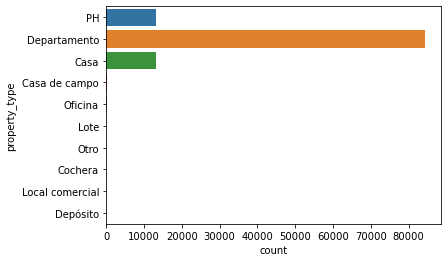

In [75]:
#Veamos la distribución de los tipos de propidad
sns.countplot(data=bd3, y= 'property_type')

Por el resultado anterior, antes de hacer el encoder primero filtraremos el dataset para trabajar sólo con casas, departamentos y PH

In [76]:
bd3=bd3[(bd3['property_type'].isin(['Departamento','Casa','PH']))]
bd3.shape         

(110687, 9)

In [77]:
#usando método de pandas para obtener dummies a partir del tipo de propiedad
dummies= pd.get_dummies(bd3.property_type)
bd5= pd.concat([bd3,dummies],axis=1)

In [78]:
#se debe eliminar una columna dummie para eliminar la multicolinealidad presente en las tres columnas nuevas
bd5= bd5.drop(columns='PH')
bd5

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Casa,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,0,0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0,0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,0,0
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,PH,0,0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0,0
...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento,0,1
146656,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento,0,1
146657,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento,0,1
146658,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento,0,1


Con el arreglo anterior podemos introducir al modelo de regresión el tipo de propiedad como una variable predictora, así, cuando Casa tiene el valor 1 indica que es una Casa e igual para el Departamento, si Casa es 0 y Departamento es 0 quiere decir que el tipo de propiedad es PH

Practiquemos el procedimiento anterior pero usando las herramientas de sklearn

In [79]:
#selección de la variable categórica nominal
bd51= bd3[['property_type']]

In [80]:
#Carga de libreria de encoding
from sklearn.preprocessing import OneHotEncoder

In [81]:
#crear objeto de encoding indicando que elimine la primer variable dummy
enc = OneHotEncoder(drop='first')

In [82]:
#entrenamiento y aplicación del encoding
ndb51= enc.fit_transform(bd51).toarray()

In [83]:
#nombres del arreglo nuevo
enc.get_feature_names()

array(['x0_Departamento', 'x0_PH'], dtype=object)

In [84]:
#transformar el arrego en un dataset
bd51=pd.DataFrame(ndb51,columns=['Departamento','PH'])

In [85]:
bd6f=pd.concat([bd3,bd51],axis=1)
bd6f

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Departamento,PH
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,0.0,1.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0,1.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,0.0,1.0
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,PH,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento,NaN,NaN
146656,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento,NaN,NaN
146657,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento,NaN,NaN
146658,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento,NaN,NaN


Evaluemos nuevamente el modelo aplicando el encoding para incluir el tipo de propiedad como variable predictora

In [86]:
#reentrenado el modelo luego de eliminar valores atípicos
X= bd5.drop(columns=['price','property_type'])
y= bd5['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)
tree_op= DecisionTreeRegressor(max_depth = 17, random_state=20)
tree_op.fit(X_train, y_train)
y_train_pred_arbol = tree_op.predict(X_train)
y_test_pred_arbol = tree_op.predict(X_test)

rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 20956.70821305646
La raíz del error cuadrático medio en Test es de: 46169.74822259385


Comparando el error obtenido respecto al obtenido con la eliminación de los valores atípicos, la mejora no fue la esperada al incluir el tipo de propiedad como variable predictora.

## Reducción de dimensionalidad SVD

Vamos a seleccionar sólo las variables que nos han venido interesando para la predicción del precio y aplicaremos la reducción de dimensionalidad SVD para reducir a tres componentes el número de variables predictoras

In [87]:
bd6= bd5[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','Departamento','Casa']]

In [88]:
#cargamos la librería de SVD
from sklearn.decomposition import TruncatedSVD

In [89]:
#Creación de objeto de reducción
svd = TruncatedSVD(n_components=4, random_state=42)

#entrenamiento y aplicación de la reducción de variables
bd6= svd.fit_transform(bd6)
bd6

array([[ 8.33109820e+01,  3.64768579e+01, -5.89230737e-01,
         3.98073219e-01],
       [ 5.56920007e+01,  3.08805985e+01, -7.09457009e-01,
        -1.88716662e-01],
       [ 9.55165929e+01,  2.46380136e+01, -5.37712037e-01,
        -1.53728640e-01],
       ...,
       [ 5.77316273e+01,  1.98745053e+01, -5.76087900e-01,
         7.38848755e-01],
       [ 4.70336109e+01,  2.60962273e+01, -1.21463133e+00,
         4.82871228e-01],
       [ 9.28177883e+01,  5.14619237e+01, -1.11274329e+00,
        -1.49699429e-02]])

Finalmente vamos a ver qué tanto mejora el  modelo inicial luego de haber aplicado al set de datos la eliminación de valores atípicos, encoding y reducción de dimensionalidad SVD:

In [90]:
#reentrenado el modelo luego de eliminar valores atípicos
X= bd6
y= bd5['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)
tree_op= DecisionTreeRegressor(max_depth = 17, random_state=20)
tree_op.fit(X_train, y_train)
y_train_pred_arbol = tree_op.predict(X_train)
y_test_pred_arbol = tree_op.predict(X_test)

rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 42980.01221204145
La raíz del error cuadrático medio en Test es de: 59952.13926529287


Nuevamente, con la reducción de dimensionalidad no se obtuvo un mejor modelo, por lo cual, en conclusión, el mejor modelo se obtuvo  aplicanco sólamente eliminación de valores atípicos y encoding, transformaciones con las cuales se minimizaron los errores del modelo inicial de 64721.07 para el modelo de entrenamiento y de 146702.44 del modelo de pruebas a 20956.71 y 46169.75 respectivamente.

##  PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

In [91]:
#Nuevamente carguemos otras librerías que utilizaremos
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

In [92]:
#Cargamos nuevamente los datos con los que se va a trabajar
X= bd5.drop(columns=['price','property_type'])
y= bd5['price']

#Separación de los datos de entranamiento y de testeo
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.7, random_state=42)

### 1. Modelo Polinómico y con Regularización

A continuación se aplicará un modelo polinómico grado 3 y luego un modelo con regularización tanto Ridge como Lasso para determinar cual de las dos es mejor para nuestro modelo.

La siguiente función nos permitirá evaluar los modelos polinómicos de y con regularización con menos código

In [93]:
##Función para evaluar los modelos
def evaluar_regresion(model,X,y, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

A continuación construiremos un modelo polinómico grado 3

In [94]:
#Se importa la clase PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.transform(X_test)

reg_2 = DecisionTreeRegressor(max_depth = 17, random_state=20)
reg_2.fit(X_train_new, y_train)

evaluar_regresion(reg_2, X,y, X_train_new, X_test_new, y_train, y_test)

Raíz del error cuadrático medio en Train: 20829.42189846093
Raíz del error cuadrático medio en Test: 47104.61886171389


El anterior modelo de arbol de decisión regresor polinómico grado 3 da resultados muy similares al obtenido en la parte A. Veamos si el modelo de regresión polinómico con regularizión Ridge o Lasso son mejores utilizando los valores de los hiperparámetros que vienen por defecto

In [95]:
# Regularización Ridge
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge(alpha= 1.0, random_state=20)
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')
evaluar_regresion(reg_ridge, X,y, X_train_new, X_test_new, y_train, y_test)

Pendientes: [ 1.33709097e+04  8.83055886e+03  1.57013615e+03  7.71861655e+02
  1.34997483e+03 -8.40996990e+04  1.28041563e+04 -4.39922495e+02
  1.89632697e+02 -4.74634745e+05 -5.33824059e+05  1.96895914e+03
  9.12957111e+03 -1.86203629e+04  1.36906482e+03  7.47802928e+04
  1.48303859e+04 -5.44936181e+03 -5.26584664e+05 -4.44061112e+04
 -2.38145049e+04 -2.51047319e+04 -4.03427259e+03 -5.05204905e+04
  4.50381548e+03  8.19688935e+03  3.99001642e+04  2.39423938e+04
 -4.04627403e+03 -2.05833780e+03 -9.71787100e+03  1.80151297e+04
 -2.33158035e+04  1.94106915e+04 -1.02320163e+04  4.09373763e+03
 -1.56842078e+04  1.34068417e+04 -1.95017463e+04  5.81132278e+03
  2.46019168e+03 -3.89554635e+04  2.05366542e+04 -2.18595091e+04
 -1.28213068e+00 -5.42681983e+01 -1.10884789e+04 -6.98645099e+03
 -4.41688021e+01 -7.52188785e+04 -7.89107960e+03 -4.39924664e+02
  0.00000000e+00  1.89633502e+02 -2.03545891e+05  3.53769857e+05
 -1.78443521e+04 -6.89063985e+03  1.51125619e+04  1.15045694e+02
  5.77055320e

C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.57786e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [96]:
#Regularización Lasso
reg_lasso = Lasso(alpha = 1.0, random_state=20)
reg_lasso.fit(X_train_new,y_train)
print(reg_lasso.coef_, reg_lasso.intercept_)
evaluar_regresion(reg_lasso, X,y, X_train_new, X_test_new, y_train, y_test)

[ 8.71350577e+05  2.75086583e+04  8.11985706e+04  3.96534389e+03
  3.73445034e+04 -9.77481948e+01 -2.46185689e+02 -3.01491797e+04
  7.35294271e+02 -5.69057317e+03  1.72711672e+04  7.60456554e+01
 -1.21573896e+02 -9.66735292e+02 -2.36921403e+00  8.84045255e+00
  1.04068507e+03 -5.72987581e+02 -4.37911373e+03  1.43370134e+01
 -3.96819128e+00  2.80199311e+00  1.17332650e-01 -2.09021598e+00
  2.45554990e+02  5.20546995e+01  5.71903511e+02  2.60259411e+03
  1.49386181e+03  5.75698498e+00  8.66279001e+01 -1.94326135e+04
 -4.92578370e+03 -1.36006997e+03 -1.03536071e+03  1.48685066e+00
  6.15396724e+01 -1.29316519e+03 -6.07599140e+03  4.12124540e+03
 -3.60767184e+01  5.47068992e+01 -2.45640573e+02 -2.44920701e+03
 -1.86689293e-02 -3.30203549e-01  6.53409358e+01  1.19912196e+02
 -8.10531897e-01 -3.18591789e+00  7.07073476e+02  3.75028858e+04
  0.00000000e+00 -1.38094193e+03  2.95740187e+02 -2.58499425e+02
 -2.87325515e+01  1.99141448e+00  5.50001206e+00  2.85927069e-01
  8.68601590e-02  1.72218

C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131238672340650.22, tolerance: 72353340910.47896
  model = cd_fast.enet_coordinate_descent(


Se acaban de entrenar tres modelos, un modelo de regresión polinómico grado 3 el cual tiene resultados RMSE similares a nuestro modelo inicial y otros dos modelos aplicando regularización lasso y ridge al modelo polinómico los cuales no presentan mejoría pero se debe tener en cuenta que no se han optimizado los hiperparámetros de estos modelos y se evaluan con los parámetros por defecto.

### Optimización de  Hiperparámetros

Ahora vamos a optimizar los hiperparámetros para la regresión con atributos polinómicos y un modelo de regularización

In [97]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

A continuación se aplica la técnica de GridSearch con validación cruzada para optimizar el modelo de regresión polinómico grado 3 y basados en el modelo del proyecto 1, para optimizar el rendimiento de la máquina se evaluará una profundidad en el árbol entre 10 y 20, ya que en el proyecto 1 se había encontrado que el valor óptimo era de 17

In [98]:
param_grid = {'max_depth':np.arange(10, 20),
              'random_state':[20]}

In [99]:
# ESTRATEGIA: Grid Search
reg_3 = DecisionTreeRegressor()
model3 = GridSearchCV(reg_3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

# Entrenamos: tree con la grilla definida arriba y CV con tamaño de Fold=5
model3.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'random_state': [20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
print("Mejores parametros: "+str(model3.best_params_))
print("Mejor Score: "+str(model3.best_score_)+'\n')


score=model3.cv_results_['mean_train_score']
score

Mejores parametros: {'max_depth': 15, 'random_state': 20}
Mejor Score: -2193168135.354493



array([-1.76487116e+09, -1.52469335e+09, -1.28999236e+09, -1.06694570e+09,
       -8.64946064e+08, -6.89377447e+08, -5.38934837e+08, -4.11886541e+08,
       -3.09649931e+08, -2.30229608e+08])

In [101]:
#Convertimos el score a RMSE
RMSE= np.round(np.sqrt(-score), 2)
RMSE

array([42010.37, 39047.32, 35916.46, 32664.13, 29409.97, 26256.  ,
       23214.97, 20294.99, 17596.87, 15173.32])

Para el modelo polinómico la técnica GridSearch con validación cruzada indica que el mejor hiperparámetro para el árbol regresor es una profundidad de 15 y arroja un RMSE sobre el set de entrenamiento de 26256. Ahora apliquemos el modelo al set de entrenamiento para conocer el RMSE

In [102]:
#Predecimos en los datos de test
prediction_poly = model3.predict(X_test_new)

In [103]:
#RMSE sobre el set de test
rmse_test_poly= np.sqrt(mean_squared_error(y_test, prediction_poly))
rmse_test_poly

46440.099434978176

El RMSE sobre el set de pruebas es de 46440.En terminos generales los resultados de este modelo son aceptables y con la optimización muestra una mejoría en la métrica objetivo pero sólo sobre el set de test mas no sobre el set de entrenamiento

A continuación se optimizará el modelo de bajo regularización Ridge aplicando GridRandomSear, no se optimizará el modelo de regularización Lasso ya que fue el que dió pero resultado con los parámetros por defecto. Los parámetros alpha a evaluar se eligen partiendo del valor por defecto de la función que es 1.0 y descenciendo en escalas de decimas, centésimas, milésimas...

In [104]:
# Grilla para Random Search
param_dist = {'alpha':[1.0,0.1,0.001,0.0001],
              'random_state':[20]}

In [105]:
reg2_ridge = Ridge()
model = RandomizedSearchCV(reg2_ridge, param_dist,n_iter=100, random_state=0, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

# Entrenamos: Ridge con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train_new, y_train)

C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05649e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03441e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00715e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\jchaverr\Anaconda3\envs\Acamica\lib\site-packages\sklearn\line

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': [1.0, 0.1, 0.001, 0.0001],
                                        'random_state': [20]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [106]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


score=model.cv_results_['mean_train_score']
score

Mejores parametros: {'random_state': 20, 'alpha': 0.1}
Mejor Score: -3331477871.7743635



array([-3.07770190e+09, -3.06617758e+09, -3.04714644e+09, -3.02153342e+09])

In [107]:
#Convertimos el score a RMSE
RMSE= np.round(np.sqrt(-score), 2)
RMSE

array([55477.04, 55373.08, 55200.96, 54968.48])

La optimización anterior indica que se optiene una mejor regularización Ridge con un alpha de 0.1 para el cual el RMSE del set de entrenamiento es de 55373. Ahora apliquemos el modelo al set de pruebas

In [108]:
#Predecimos en los datos de test
prediction_ridge = model.predict(X_test_new)

In [109]:
#RMSE sobre el set de pruebas
rmse_test_ridge= np.sqrt(mean_squared_error(y_test, prediction_ridge))
rmse_test_ridge

56987.42853263071

Finalmente se obtiene para el set de test un RMSE de 56987. Las métricas obtenidas para el modelo de regularización Ridge optimizado no son mejores respecto a los resultados obtenidos hasta ahora con los otros modelos, por lo cual descartaremos de este modelo.

### Validación Cruzada para los modelos de regresión polinómicos y con regularización

In [110]:
from sklearn.model_selection import cross_validate

In [111]:
#Se transforma la base de datos a polinomio grado 3
X3= poly.transform(X)

reg_3_poly = DecisionTreeRegressor(max_depth=15, random_state=20)
reg2_ridge = Ridge(alpha=0.01,random_state=20)

poly_cross = cross_validate(reg_3_poly,X, y, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
ridge = cross_validate(reg2_ridge, X, y, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
print(poly_cross)
print(ridge)

{'fit_time': array([0.53318429, 0.47571039, 0.48380184, 0.46220374, 0.47058392]), 'score_time': array([0.01040173, 0.01013541, 0.01035905, 0.00992036, 0.00810027]), 'test_score': array([-2.01648685e+09, -2.03765244e+09, -2.29899394e+09, -2.16252207e+09,
       -1.90431300e+09]), 'train_score': array([-8.02476726e+08, -7.75521258e+08, -7.75374700e+08, -7.44950623e+08,
       -7.62999534e+08])}
{'fit_time': array([0.02621555, 0.03194952, 0.0218246 , 0.0262084 , 0.02823162]), 'score_time': array([0.00404596, 0.00711942, 0.00399923, 0.00490403, 0.00151491]), 'test_score': array([-4.33281646e+09, -4.38406710e+09, -4.28929597e+09, -4.31313564e+09,
       -4.40918077e+09]), 'train_score': array([-4.32898261e+09, -4.31742392e+09, -4.33773434e+09, -4.33277179e+09,
       -4.31147546e+09])}


Ahora calcularemos los RMSE promedio de ambos modelos tanto para los set de entrenamiento como de prueba

In [112]:
#Calculemos el RMSE promedio para train y test para regresión polinómica
RMSE_poly_train=np.sqrt(-(poly_cross['train_score'])).mean()
RMSE_poly_test=np.sqrt(-(poly_cross['test_score'])).mean()
print(f'Para la regresión polinómica grado 3 el RMSE_train promedio es de:{RMSE_poly_train}', f'y el RMSE_test promedio es de:{RMSE_poly_test}')

#Calculemos el RMSE promedio para train y test para regularización ridge
RMSE_ridge_train=np.sqrt(-(ridge['train_score'])).mean()
RMSE_ridge_test=np.sqrt(-(ridge['test_score'])).mean()
print(f'Para la regularización Ridge el RMSE_train promedio es de:{RMSE_ridge_train}', f'y el RMSE_test promedio es de:{RMSE_ridge_test}')

Para la regresión polinómica grado 3 el RMSE_train promedio es de:27787.596616798266 y el RMSE_test promedio es de:45626.971806195135
Para la regularización Ridge el RMSE_train promedio es de:65769.8419791618 y el RMSE_test promedio es de:65921.05349575188


## 2.Modelo Boosting

A continuación entrenaremos un modelo de ensable aplicando la técnica boosting para la obtención de un mejor modelo  de árbol de regresión.

In [113]:
from sklearn.ensemble import AdaBoostRegressor

In [114]:
#Ensamble con los parámetros iniciales del modelo del proyecto 1
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=17, random_state=20),random_state=20)

# Entrenamos el modelo
ada_clf.fit(X_test, y_test)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=17,
                                                       random_state=20),
                  random_state=20)

In [115]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)
print('Raíz del error cuadrático medio en Train:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Raíz del error cuadrático medio en Test:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Raíz del error cuadrático medio en Train: 39154.160114157006
Raíz del error cuadrático medio en Test: 10943.760953892615


Con el modelo anterior se observa cómo el modelo de ensamble boosting es mucho mejor para predecir los nuevos valores respecto a los que hemos evaluado anteriormente.
A continuación se grafica el error sobre los datos de entrenamiento y los datos de predicción en función del número de árboles, apreciando adicionalmente que los primeros árboles son los que más le aportan al modelo

Text(0.5, 0, 'Número de árboles')

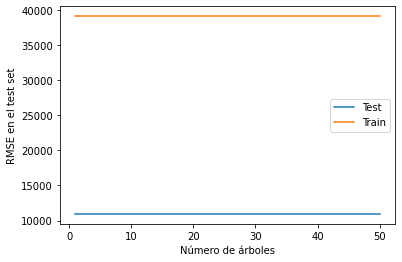

In [116]:
# Definimos listas vacias donde vamos a "appendear" (agregar) los valores
accuracy_test = []
accuracy_train = []

# Calculamos el RMSE sobre el test set
for prediccion_test in ada_clf.staged_predict(X_test):
    accuracy_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
# Calculamos el RMSE sobre el training set    
for prediccion_train in ada_clf.staged_predict(X_train):  
    accuracy_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    
plt.plot(range(1, len(accuracy_test) + 1), accuracy_test, label = 'Test')
plt.plot(range(1, len(accuracy_test) + 1), accuracy_train, label = 'Train')
plt.legend()
plt.ylabel('RMSE en el test set')
plt.xlabel('Número de árboles')

### Optimización de  Hiperparámetros

A continuación se optimizan los hiperparámetros del modelo de ensamble, para lo cual, se optimizará un nivel de profundidad del árbol regresor entre 2 y 20 y un rango de estimadores entre 1 y 11 ya que en el gráfico anterior se apercia que los RMSE obtenidos en el ensamble inicial se estabilizan muy rápido y por último se mantienen las semillas del estimador

In [117]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [118]:
#Estimador y estimador de base
ada_clf_1 = AdaBoostRegressor(DecisionTreeRegressor())


In [119]:
param_grid = {'base_estimator__max_depth': np.arange(2,20),
              'n_estimators':np.arange(1,11),
              'random_state':[20],
              'base_estimator__random_state':[20]}

In [120]:
# ESTRATEGIA 1: Grid Search
model_ada = GridSearchCV(ada_clf_1, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

# Entrenamos: el modelo con la grilla definida arriba y CV con tamaño de Fold=5
model_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'base_estimator__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'base_estimator__random_state': [20],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'random_state': [20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [121]:
print("Mejores parametros: "+str(model_ada.best_params_))
print("Mejor Score: "+str(model_ada.best_score_)+'\n')

score=model_ada.cv_results_['mean_train_score']
score

Mejores parametros: {'base_estimator__max_depth': 19, 'base_estimator__random_state': 20, 'n_estimators': 10, 'random_state': 20}
Mejor Score: -1432682973.8999755



array([-5.19390439e+09, -5.19390439e+09, -4.74679915e+09, -4.76684601e+09,
       -4.60223100e+09, -4.57607247e+09, -4.50916143e+09, -4.44399143e+09,
       -4.42176285e+09, -4.44898997e+09, -4.47548827e+09, -4.47548827e+09,
       -4.02339222e+09, -3.95621604e+09, -3.81080906e+09, -3.78736682e+09,
       -3.83273415e+09, -3.83062955e+09, -3.84891212e+09, -3.87546534e+09,
       -3.92908568e+09, -3.92908568e+09, -3.47718564e+09, -3.42688963e+09,
       -3.31264364e+09, -3.29154519e+09, -3.30686561e+09, -3.26797038e+09,
       -3.27469897e+09, -3.28234657e+09, -3.39556060e+09, -3.39556060e+09,
       -3.01871987e+09, -2.99670287e+09, -2.92145215e+09, -2.88148899e+09,
       -2.90479655e+09, -2.88233935e+09, -2.90535152e+09, -2.92012774e+09,
       -2.96382759e+09, -2.96382759e+09, -2.72634521e+09, -2.69999624e+09,
       -2.63919472e+09, -2.61310645e+09, -2.62493283e+09, -2.60543914e+09,
       -2.61653031e+09, -2.61664342e+09, -2.66104490e+09, -2.66104490e+09,
       -2.45530986e+09, -

In [122]:
#Convertimos el score a RMSE
RMSE= np.round(np.sqrt(-score), 2)
RMSE

array([72068.75, 72068.75, 68897.02, 69042.35, 67839.74, 67646.67,
       67150.29, 66663.27, 66496.34, 66700.75, 66899.09, 66899.09,
       63430.22, 62898.46, 61731.75, 61541.59, 61909.08, 61892.08,
       62039.6 , 62253.24, 62682.42, 62682.42, 58967.67, 58539.64,
       57555.57, 57371.99, 57505.35, 57166.16, 57224.99, 57291.77,
       58271.44, 58271.44, 54942.88, 54742.15, 54050.46, 53679.5 ,
       53896.16, 53687.42, 53901.31, 54038.21, 54441.05, 54441.05,
       52214.42, 51961.49, 51373.09, 51118.55, 51234.1 , 51043.5 ,
       51152.03, 51153.14, 51585.32, 51585.32, 49551.08, 49511.3 ,
       49078.11, 48837.71, 48790.67, 48711.89, 48740.91, 48726.15,
       49283.73, 49283.73, 47309.8 , 47283.79, 46731.16, 46557.07,
       46412.03, 46244.44, 46222.65, 46136.37, 47151.9 , 47151.9 ,
       44766.74, 44683.08, 44033.11, 43868.68, 43710.72, 43535.89,
       43422.35, 43320.79, 45103.69, 45103.69, 42101.51, 42062.03,
       41146.43, 41084.19, 40669.04, 40618.9 , 40460.18, 40308

La optimización mediante GridSearch y validación cruzada indican que el mejor resultao se optiene para una profundidad de 19 y 10 estimadores o árboles en el ensamble, con un RMSE sobre el set de entrenamiento de 9596. Ahora probemos el modelos sobre el set de test

In [123]:
#Predecimos en los datos de test
prediction_ada = model_ada.predict(X_test)

In [124]:
rmse_test_ada= np.sqrt(mean_squared_error(y_test, prediction_ada))
rmse_test_ada

37269.37388941552

El RMSE para el ensamble optimizado sobre el set de test es de 37269.3739. Por lo tanto, la métrica obtenida para el conjunto de entrenamiento mejora respecto al modelo inicial y para el conjunto de prueba no mejora pero sigue siendo un resultado aceptable.

### Validación Cruzada para el ensamble

In [125]:
from sklearn.model_selection import cross_validate

In [126]:
#Validación cruzada del ensamble del arbol regresor con los parámetros optimizados
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=19, random_state=20),n_estimators=10,random_state=20)
ada_scores = cross_validate(ada, X, y, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
print(ada_scores)

{'fit_time': array([4.5614121 , 4.7254498 , 4.42805791, 4.45126677, 5.27234101]), 'score_time': array([0.07297421, 0.07457471, 0.07141399, 0.08155084, 0.07112122]), 'test_score': array([-1.33106850e+09, -1.35379864e+09, -1.46832657e+09, -1.47959433e+09,
       -1.21563879e+09]), 'train_score': array([-1.08880133e+08, -1.09800907e+08, -1.10156595e+08, -1.08725368e+08,
       -1.09492373e+08])}


Con los resultados de la validación cruzada, procedemos a calcular el valor promedio de la métrica RMSE para comparar el modelo optimizado respecto a los anteriores.

In [127]:
#Calculemos el RMSE promedio para train y test
RMSE_ada_train=np.sqrt(-(ada_scores['train_score'])).mean()
RMSE_ada_test=np.sqrt(-(ada_scores['test_score'])).mean()
print(f'El RMSE_train promedio es de:{RMSE_ada_train}', f'y el RMSE_test promedio es de:{RMSE_ada_test}')

El RMSE_train promedio es de:10459.94288421822 y el RMSE_test promedio es de:36985.61422238916


## PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

Respecto a los resultados del modelo del proyecto 1 el cual arrojó unas métricas de RMSE_train= 64721.0698 y RMSE_test= 146702.4405, cualquiera de los modelos presentados en la parte B de este proyecto 2 y luego de haber aplicado la transformación de datos en la parte A de imputación de datos, eliminación de atípicos y encoding presenta mejoras en la métrica de evaluación de los modelos lo cual indica que cualquier modelo de la parte B es mejor respecto a nuestro primer modelo.

Por otra parte, si comparamos entre los modelos de la parte B, el ensamble Boosting es el que en general representa mejor desempeño, el cual, luego de la optimización de parámetros y de la validación cruzada, tiene unas métricas de RMSE_train= 10420.8553 y RMSE_test= 36776.6959.

A continuación consultaremos a partir del ensamble inicial la importancia de cada variable

In [128]:
#Importancia de cada variable
ada_clf.feature_importances_

array([0.18232928, 0.16020518, 0.01819931, 0.01415111, 0.26782107,
       0.12025828, 0.20396294, 0.00412907, 0.02894375])

In [129]:
#Variables utilizadas
X.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'Casa', 'Departamento'],
      dtype='object')

De acuerdo a los resultados anteriores, las variables de mayor importancia fueron el número de baños y el área construída con un 26,7% y 20,4% de importancia respectivamente, seguidas de la latitud, longitud y el área total con porcentajes de importancia de 18%, 16% y 12% respectivamente.

Ahora revisemos la importancia de los árboles del ensamble:

(0.0, 51.0)

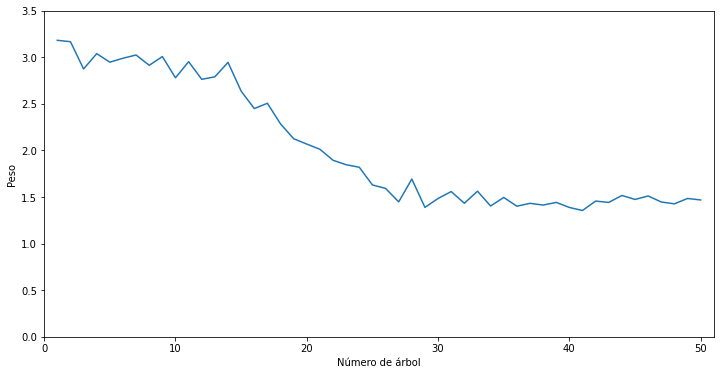

In [130]:
# Puede que el algoritmo termine antes de agregar todos los arboles
# Tomamos entonces la cantidad de arboles que realmente tiene el ensamble
numero_arboles = len(ada_clf)

# En la variable estimator_weights_ esta el peso de cada arbol
peso_arbol = ada_clf.estimator_weights_[:numero_arboles]

# Calculamos la importancia de los features. En estimator_errors_ esta el error que comete cada uno.
peso_feature = ada_clf.feature_importances_

# Graficamos
plt.figure(figsize = (12,6))
# En el eje 'x' ponemos el índice (número) de cada arbol, en el 'y' los pesos
plt.plot(range(1, numero_arboles + 1), peso_arbol)
plt.ylabel('Peso')
plt.xlabel('Número de árbol')
plt.ylim((0, peso_arbol.max() * 1.1))
plt.xlim((0, numero_arboles + 1))

En cuanto a los pesos de cada árbol, se aprecia un descenso marcado en el nivel de importancia de los árboles número 5 y 30 aproximadamente, por lo cual, miremos la importancia de las variables para ambos árboles:

In [131]:
importancias= pd.DataFrame(np.array([ada_clf[0].feature_importances_,ada_clf[14].feature_importances_,ada_clf[25].feature_importances_,ada_clf[49].feature_importances_]),columns=X.columns)
importancias

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento
0,0.163105,0.141605,0.011390,0.009746,0.335774,0.143177,0.156857,0.002207,0.036139
1,0.207176,0.182267,0.017741,0.012028,0.278543,0.104400,0.173879,0.004605,0.019362
2,0.189335,0.150992,0.021671,0.013377,0.307384,0.114904,0.174276,0.003333,0.024727
3,0.188922,0.138753,0.030071,0.021463,0.117540,0.113355,0.367203,0.007026,0.015667


En el dataframe anterior se observa el porcentaje de importancia de cada variable para los árboles 1, 15, 26 y 50 del ensamble. En general estos árboles no se diferencian mucho en cuanto a los porcentajes de importancia que le asigna a los atributos pero lo que sí se puede rescatar es que a medida que avanza el ensamble va adquiriendo mayor importancia el área construída ya que para el primer árbol tiene un importancia del 16% y para el último árbol su importancia se eleva al 37%, mientras que lo contrario le ocurre al atributo número de baños que inicia con una importancia del 34% y termina con una importancia del 11% y es por este comportamiento que ambas variables terminan siendo las más relevantes para todo el ensamble ya que es principalmente a partir de los errores en la predicción sobre estas variables que los siguientes árboles van aprendiendo.

Como conclusión final mencinar que el modeolo de ensamble era el que esperaba fuese el mejor modelo por la forma como el mismo opera aunque sorprende los features que terminaron siendo más relevantes para el modelo, pues esperaba que el tipo de propiedad al incluírlo en el modelo (Casa, Departamento, PH) fueran relevantes para la predicción y resultaron ser las de menor relevancia, mientras que la latitud y la longitud fueron más relevantes de lo esperado lo cual podría ser un buen indicio de que la ubicación es una variable importante en la fijación del precio de una propiedad y por último, el área construída y el número de baños terminaron siendo relevantes como se esperaba, pues se hay estudios qeu incluso han demostrado que un baño adicional incrementa en mayor proporción el valor de una propiedad respecto a una habitación adicional.

DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?